In [1]:
# Instalação para Google Colab - Versão Pyomo
# Execute esta célula primeiro no seu notebook

!pip install pyomo
!pip install matplotlib
!pip install seaborn

In [2]:
# Instala os solvers GLPK e CBC
!apt-get install -y -qq glpk-utils coinor-cbc

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../00-libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../01-libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../02-libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../03-libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../04-glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Selecting previously unselected package c

In [ ]:
# Verifica se os solvers estão funcionando
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

print(" Verificando solvers disponíveis:")

# Teste GLPK
try:
    solver_glpk = SolverFactory('glpk')
    if solver_glpk.available():
        print(" GLPK: Disponível")
    else:
        print(" GLPK: Não disponível")
except:
    print(" GLPK: Erro na verificação")

# Teste CBC
try:
    solver_cbc = SolverFactory('cbc')
    if solver_cbc.available():
        print(" CBC: Disponível")
    else:
        print(" CBC: Não disponível")
except:
    print(" CBC: Erro na verificação")

print("\n Instalação concluída! Agora você pode executar o otimizador.")

 OTIMIZAÇÃO DE LABORATÓRIO GENÔMICO 
Baseado no artigo de Tavares, Evangelista e De Oliveira
Versão Pyomo - Solvers: GLPK e CBC
FORMULAÇÃO DO PROBLEMA DE OTIMIZAÇÃO

 VARIÁVEIS DE DECISÃO:
x1 = número de experimentos RNA-seq a serem realizados
x2 = número de experimentos PCR a serem realizados
x3 = número de experimentos ChIP-seq a serem realizados

 PARÂMETROS POR EXPERIMENTO:
             Tempo Máquina (h)  Reagentes (u)  Horas Técnico (h)  \
Experimento                                                        
RNA-seq                      4             10                  3   
PCR                          2              5                  2   
ChIP-seq                     6             12                  5   

             Prioridade (peso)  
Experimento                     
RNA-seq                      8  
PCR                          4  
ChIP-seq                    10  

 RECURSOS DISPONÍVEIS:
T = 100 horas de máquina
R = 200 unidades de reagentes
H = 120 horas de técnico

 FUNÇÃO 

,Experimento,Prioridade (p),Tempo (t),Reagentes (r),Horas (h),p/t,p/r,p/h
0,RNA-seq,8,4,10,3,2.000000,0.800000,2.666667
1,PCR,4,2,5,2,2.000000,0.800000,2.000000
2,ChIP-seq,10,6,12,5,1.666667,0.833333,2.000000



 RANKING POR EFICIÊNCIA:
1. Por p/t (prioridade/tempo):
   RNA-seq: 2.00
   PCR: 2.00
   ChIP-seq: 1.67
2. Por p/r (prioridade/reagentes):
   ChIP-seq: 0.83
   RNA-seq: 0.80
   PCR: 0.80

SOLUÇÃO COM PYOMO (GLPK)
 Solução ótima encontrada!
Valor objetivo máximo: 166.00
Tempo de execução total: 0.0115 segundos
Tempo de resolução: 0.0104 segundos

 Número de experimentos:
RNA-seq: 0 experimentos
PCR: 4 experimentos
ChIP-seq: 15 experimentos

 ANÁLISE DE USO DE RECURSOS (Pyomo (GLPK)):
 Tempo de máquina: 98.0/100 horas (98.0%)
 Reagentes: 200.0/200 unidades (100.0%)
 Horas técnico: 83.0/120 horas (69.2%)
 Recurso gargalo: Reagentes (100.0%)

SOLUÇÃO COM PYOMO (CBC)
 Solução ótima encontrada!
Valor objetivo máximo: 166.00
Tempo de execução total: 0.0413 segundos
Tempo de resolução: 0.0408 segundos

 Número de experimentos:
RNA-seq: 0 experimentos
PCR: 4 experimentos
ChIP-seq: 15 experimentos

 ANÁLISE DE USO DE RECURSOS (Pyomo (CBC)):
 Tempo de máquina: 98.0/100 horas (98.0%)
 Reagentes: 

,Solver,Valor Objetivo Máximo,Tempo Total (s),Tempo Resolução (s),RNA-seq,PCR,ChIP-seq,Tempo de máquina,Reagentes,Horas técnico,Recurso gargalo
0,Pyomo (GLPK),166.0,0.0115,0.0104,0.0,4.0,15.0,98.0/100 horas (98.0%),200.0/200 unidades (100.0%),83.0/120 horas (69.2%),Reagentes (100.0%)
1,Pyomo (CBC),166.0,0.0413,0.0408,0.0,4.0,15.0,98.0/100 horas (98.0%),200.0/200 unidades (100.0%),83.0/120 horas (69.2%),Reagentes (100.0%)



 Gerando visualizações...


/tmp/ipython-input-12-1424174252.py:341: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(methods, rotation=45)


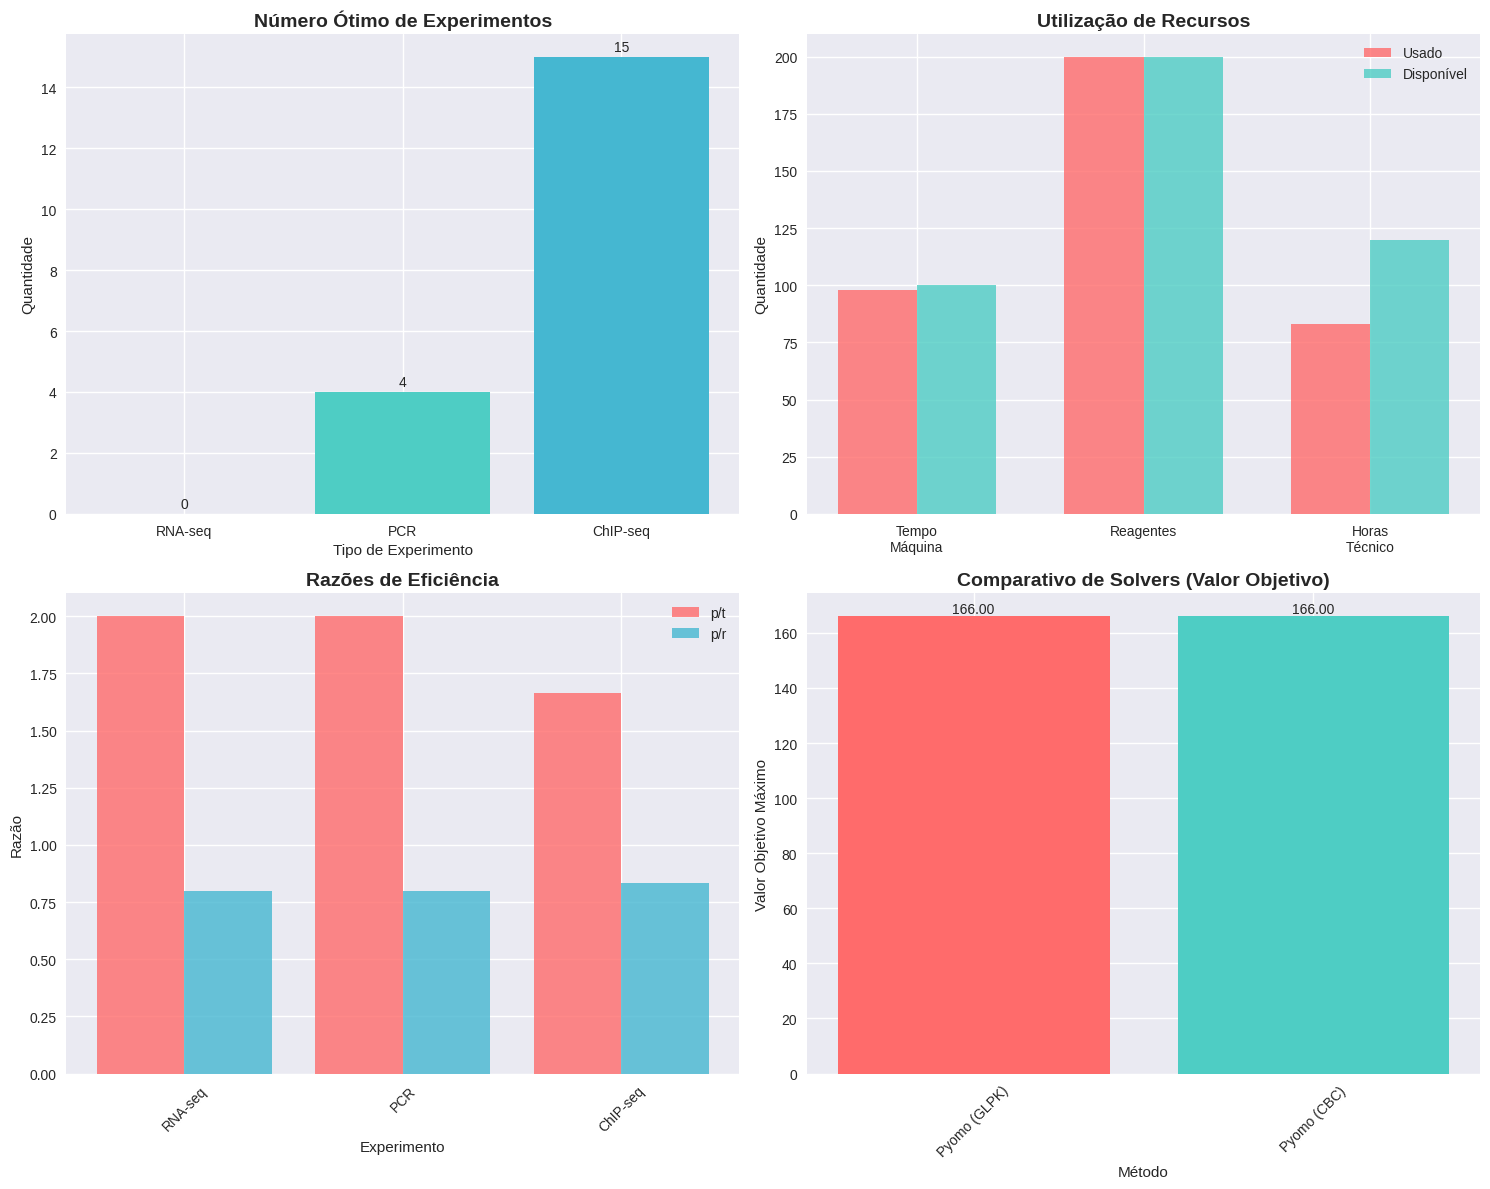


 Análise completa finalizada!

Referência: Tavares, J.W.R., Evangelista, A., De Oliveira, A.
"Optimal Allocation of Laboratory Resources for Genomic Experiments Using Linear Programming"



In [12]:
"""
Alocação Ótima de Recursos de Laboratório Para Experimentos Genômicos Usando Programação Linear Inteira

Baseado no artigo: "Optimal Allocation of Laboratory Resources for Genomic Experiments Using Integer Linear Programming"
Autores: Jailton Wagner Rodrigues Tavares, Adelaide Evangelista, Aline De Oliveira

Este código implementa o modelo de programação linear inteira para otimização de recursos
em laboratórios de genômica, considerando restrições de tempo de máquina, reagentes e horas de técnico.
Versão modificada usando Pyomo com solvers GLPK e CBC.
"""

import numpy as np
import pandas as pd
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
import seaborn as sns
import time

class GenomicLabOptimizer:
    """
    Otimizador para alocação de recursos em laboratórios genômicos
    """

    def __init__(self):
        # Dados do caso de estudo do artigo
        self.experiments = {
            'RNA-seq': {'t': 4, 'r': 10, 'h': 3, 'p': 8},
            'PCR': {'t': 2, 'r': 5, 'h': 2, 'p': 4},
            'ChIP-seq': {'t': 6, 'r': 12, 'h': 5, 'p': 10}
        }

        # Recursos disponíveis (como no artigo)
        self.resources = {
            'T': 100,  # Tempo de máquina (horas)
            'R': 200,  # Reagentes (unidades)
            'H': 120   # Horas de técnico
        }

        self.n_experiments = len(self.experiments)
        self.experiment_names = list(self.experiments.keys())
        self.solutions = {}  # Dicionário para armazenar soluções

    def print_problem_formulation(self):
        """
        Imprime a formulação matemática do problema conforme o artigo
        """
        print("=" * 80)
        print("FORMULAÇÃO DO PROBLEMA DE OTIMIZAÇÃO")
        print("=" * 80)

        print("\n VARIÁVEIS DE DECISÃO:")
        for i, exp in enumerate(self.experiment_names, 1):
            print(f"x{i} = número de experimentos {exp} a serem realizados")

        print("\n PARÂMETROS POR EXPERIMENTO:")
        df_params = pd.DataFrame(self.experiments).T
        df_params.index.name = 'Experimento'
        df_params.columns = ['Tempo Máquina (h)', 'Reagentes (u)', 'Horas Técnico (h)', 'Prioridade (peso)']
        print(df_params)

        print(f"\n RECURSOS DISPONÍVEIS:")
        print(f"T = {self.resources['T']} horas de máquina")
        print(f"R = {self.resources['R']} unidades de reagentes")
        print(f"H = {self.resources['H']} horas de técnico")

        print("\n FUNÇÃO OBJETIVO:")
        obj_terms = []
        for i, exp in enumerate(self.experiment_names, 1):
            weight = self.experiments[exp]['p']
            obj_terms.append(f"{weight}x{i}")
        print(f"Maximizar Z = {' + '.join(obj_terms)}")

        print("\n RESTRIÇÕES:")

        # Restrição de tempo de máquina
        machine_terms = []
        for i, exp in enumerate(self.experiment_names, 1):
            time = self.experiments[exp]['t']
            machine_terms.append(f"{time}x{i}")
        print(f"1. Tempo de máquina: {' + '.join(machine_terms)} ≤ {self.resources['T']}")

        # Restrição de reagentes
        reagent_terms = []
        for i, exp in enumerate(self.experiment_names, 1):
            reagent = self.experiments[exp]['r']
            reagent_terms.append(f"{reagent}x{i}")
        print(f"2. Reagentes: {' + '.join(reagent_terms)} ≤ {self.resources['R']}")

        # Restrição de horas de técnico
        tech_terms = []
        for i, exp in enumerate(self.experiment_names, 1):
            hours = self.experiments[exp]['h']
            tech_terms.append(f"{hours}x{i}")
        print(f"3. Horas técnico: {' + '.join(tech_terms)} ≤ {self.resources['H']}")

        print("4. Não-negatividade: xi ∈ Z+ ∀i")

    def solve_with_pyomo(self, solver_name='glpk'):
        """
        Resolve usando Pyomo, permitindo especificar o solver e medindo tempo de execução.
        """
        print("\n" + "="*60)
        print(f"SOLUÇÃO COM PYOMO ({solver_name.upper()})")
        print("="*60)

        # Inicia a medição do tempo
        start_time = time.time()

        # Cria o modelo
        model = pyo.ConcreteModel()

        # Conjuntos
        model.I = pyo.Set(initialize=range(len(self.experiment_names)))

        # Variáveis
        model.x = pyo.Var(model.I, domain=pyo.NonNegativeIntegers)

        # Parâmetros
        p_values = [self.experiments[exp]['p'] for exp in self.experiment_names]
        t_values = [self.experiments[exp]['t'] for exp in self.experiment_names]
        r_values = [self.experiments[exp]['r'] for exp in self.experiment_names]
        h_values = [self.experiments[exp]['h'] for exp in self.experiment_names]

        # Função objetivo
        model.obj = pyo.Objective(
            expr=sum(p_values[i] * model.x[i] for i in model.I),
            sense=pyo.maximize
        )

        # Restrições
        model.machine_time = pyo.Constraint(
            expr=sum(t_values[i] * model.x[i] for i in model.I) <= self.resources['T']
        )

        model.reagents = pyo.Constraint(
            expr=sum(r_values[i] * model.x[i] for i in model.I) <= self.resources['R']
        )

        model.technician_hours = pyo.Constraint(
            expr=sum(h_values[i] * model.x[i] for i in model.I) <= self.resources['H']
        )

        # Resolve o problema
        try:
            solver = SolverFactory(solver_name)

            # Medição do tempo de resolução
            solve_start_time = time.time()
            result = solver.solve(model, tee=False)
            solve_end_time = time.time()

            # Tempo total de execução
            end_time = time.time()
            total_time = end_time - start_time
            solve_time = solve_end_time - solve_start_time

            if result.solver.termination_condition == pyo.TerminationCondition.optimal:
                print(" Solução ótima encontrada!")
                objective_value = pyo.value(model.obj)
                print(f"Valor objetivo máximo: {objective_value:.2f}")
                print(f"Tempo de execução total: {total_time:.4f} segundos")
                print(f"Tempo de resolução: {solve_time:.4f} segundos")

                solution = []
                print("\n Número de experimentos:")
                for i in model.I:
                    value = pyo.value(model.x[i])
                    solution.append(value)
                    print(f"{self.experiment_names[i]}: {int(value)} experimentos")

                resource_usage = self.analyze_resource_usage(solution, f"Pyomo ({solver_name.upper()})")
                return solution, objective_value, resource_usage, total_time, solve_time
            else:
                print(f" Solução não encontrada: {result.solver.termination_condition}")
                print(f"Tempo de execução: {total_time:.4f} segundos")
                return None, None, None, total_time, None

        except Exception as e:
            end_time = time.time()
            total_time = end_time - start_time
            print(f" Erro com Pyomo ({solver_name.upper()}): {e}")
            print(f"Tempo de execução: {total_time:.4f} segundos")
            print(" Certifique-se de que o solver está instalado e no PATH do sistema.")
            return None, None, None, total_time, None

    def analyze_resource_usage(self, solution, method_name):
        """
        Analisa o uso de recursos da solução
        """
        print(f"\n ANÁLISE DE USO DE RECURSOS ({method_name}):")

        # Calcula uso de recursos
        machine_used = sum(solution[i] * self.experiments[exp]['t']
                          for i, exp in enumerate(self.experiment_names))
        reagents_used = sum(solution[i] * self.experiments[exp]['r']
                           for i, exp in enumerate(self.experiment_names))
        tech_used = sum(solution[i] * self.experiments[exp]['h']
                       for i, exp in enumerate(self.experiment_names))

        # Calcula percentuais de utilização
        machine_pct = (machine_used / self.resources['T']) * 100
        reagents_pct = (reagents_used / self.resources['R']) * 100
        tech_pct = (tech_used / self.resources['H']) * 100

        print(f" Tempo de máquina: {machine_used:.1f}/{self.resources['T']} horas ({machine_pct:.1f}%)")
        print(f" Reagentes: {reagents_used:.1f}/{self.resources['R']} unidades ({reagents_pct:.1f}%)")
        print(f" Horas técnico: {tech_used:.1f}/{self.resources['H']} horas ({tech_pct:.1f}%)")

        # Identifica gargalo
        utilizations = {'Máquina': machine_pct, 'Reagentes': reagents_pct, 'Técnico': tech_pct}
        bottleneck = max(utilizations, key=utilizations.get)
        print(f" Recurso gargalo: {bottleneck} ({utilizations[bottleneck]:.1f}%)")

        return {
            'Tempo de máquina': f"{machine_used:.1f}/{self.resources['T']} horas ({machine_pct:.1f}%)",
            'Reagentes': f"{reagents_used:.1f}/{self.resources['R']} unidades ({reagents_pct:.1f}%)",
            'Horas técnico': f"{tech_used:.1f}/{self.resources['H']} horas ({tech_pct:.1f}%)",
            'Recurso gargalo': f"{bottleneck} ({utilizations[bottleneck]:.1f}%)"
        }

    def calculate_efficiency_ratios(self):
        """
        Calcula as razões de eficiência mencionadas no artigo (p/t e p/r)
        """
        print("\n" + "="*60)
        print("ANÁLISE DE EFICIÊNCIA (p/t e p/r)")
        print("="*60)


        efficiency_data = []
        for exp in self.experiment_names:
            p = self.experiments[exp]['p']
            t = self.experiments[exp]['t']
            r = self.experiments[exp]['r']
            h = self.experiments[exp]['h']

            efficiency_data.append({
                'Experimento': exp,
                'Prioridade (p)': p,
                'Tempo (t)': t,
                'Reagentes (r)': r,
                'Horas (h)': h,
                'p/t': p/t,
                'p/r': p/r,
                'p/h': p/h
            })

        df_efficiency = pd.DataFrame(efficiency_data)
        display(df_efficiency)


        # Ranking por eficiência
        print("\n RANKING POR EFICIÊNCIA:")
        print("1. Por p/t (prioridade/tempo):")
        sorted_by_pt = df_efficiency.sort_values('p/t', ascending=False)
        for i, row in sorted_by_pt.iterrows():
            print(f"   {row['Experimento']}: {row['p/t']:.2f}")

        print("2. Por p/r (prioridade/reagentes):")
        sorted_by_pr = df_efficiency.sort_values('p/r', ascending=False)
        for i, row in sorted_by_pr.iterrows():
            print(f"   {row['Experimento']}: {row['p/r']:.2f}")


    def create_visualization(self):
        """
        Cria visualizações dos resultados
        """
        try:
            # Resolve problema para obter solução para os plots
            # Usaremos a solução Pyomo GLPK como referência
            solution, objective, _, _, _ = self.solutions.get('Pyomo (GLPK)', (None, None, None, None, None))
            if solution is None:
                # Fallback para CBC se GLPK não estiver disponível
                solution, objective, _, _, _ = self.solutions.get('Pyomo (CBC)', (None, None, None, None, None))

            if solution is None:
                print(" Não foi possível gerar visualizações sem uma solução válida")
                return

            # Configuração do plot
            plt.style.use('seaborn-v0_8')
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

            # 1. Gráfico de barras - Número de experimentos
            ax1.bar(self.experiment_names, solution, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
            ax1.set_title('Número Ótimo de Experimentos', fontsize=14, fontweight='bold')
            ax1.set_ylabel('Quantidade')
            ax1.set_xlabel('Tipo de Experimento')
            for i, v in enumerate(solution):
                ax1.text(i, v + 0.1, str(int(v)), ha='center', va='bottom')

            # 2. Uso de recursos
            resources_used = []
            resources_available = []
            resource_names = ['Tempo\nMáquina', 'Reagentes', 'Horas\nTécnico']

            machine_used = sum(solution[i] * self.experiments[exp]['t'] for i, exp in enumerate(self.experiment_names))
            reagents_used = sum(solution[i] * self.experiments[exp]['r'] for i, exp in enumerate(self.experiment_names))
            tech_used = sum(solution[i] * self.experiments[exp]['h'] for i, exp in enumerate(self.experiment_names))

            resources_used = [machine_used, reagents_used, tech_used]
            resources_available = [self.resources['T'], self.resources['R'], self.resources['H']]

            x = np.arange(len(resource_names))
            width = 0.35

            ax2.bar(x - width/2, resources_used, width, label='Usado', color='#FF6B6B', alpha=0.8)
            ax2.bar(x + width/2, resources_available, width, label='Disponível', color='#4ECDC4', alpha=0.8)
            ax2.set_title('Utilização de Recursos', fontsize=14, fontweight='bold')
            ax2.set_ylabel('Quantidade')
            ax2.set_xticks(x)
            ax2.set_xticklabels(resource_names)
            ax2.legend()

            # 3. Razões de eficiência
            experiments = list(self.experiments.keys())
            pt_ratios = [self.experiments[exp]['p']/self.experiments[exp]['t'] for exp in experiments]
            pr_ratios = [self.experiments[exp]['p']/self.experiments[exp]['r'] for exp in experiments]

            x = np.arange(len(experiments))
            ax3.bar(x - 0.2, pt_ratios, 0.4, label='p/t', color='#FF6B6B', alpha=0.8)
            ax3.bar(x + 0.2, pr_ratios, 0.4, label='p/r', color='#45B7D1', alpha=0.8)
            ax3.set_title('Razões de Eficiência', fontsize=14, fontweight='bold')
            ax3.set_ylabel('Razão')
            ax3.set_xlabel('Experimento')
            ax3.set_xticks(x)
            ax3.set_xticklabels(experiments, rotation=45)
            ax3.legend()

            # 4. Comparativo de Solvers (Valor Objetivo)
            if self.solutions:
                methods = list(self.solutions.keys())
                objectives = [self.solutions[method][1] for method in methods]

                bars = ax4.bar(methods, objectives, color=['#FF6B6B', '#4ECDC4'][:len(methods)])
                ax4.set_title('Comparativo de Solvers (Valor Objetivo)', fontsize=14, fontweight='bold')
                ax4.set_ylabel('Valor Objetivo Máximo')
                ax4.set_xlabel('Método')
                ax4.set_xticklabels(methods, rotation=45)
                for i, v in enumerate(objectives):
                    ax4.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')
            else:
                ax4.set_title('Comparativo de Solvers (Sem Dados)', fontsize=14, fontweight='bold')

            plt.tight_layout()
            plt.savefig('genomic_lab_optimization.png', dpi=300, bbox_inches='tight')
            plt.show()

        except ImportError:
            print(" Matplotlib não disponível para visualizações")
        except Exception as e:
            print(f" Erro na criação de visualizações: {e}")

    def compare_solvers_details(self):
        """
        Gera um comparativo detalhado dos resultados de cada solver, incluindo tempo de execução.
        """
        print("\n" + "="*60)
        print("COMPARATIVO DETALHADO DOS SOLVERS")
        print("="*60)

        comparison_data = []

        for method, (solution, objective, resource_usage, total_time, solve_time) in self.solutions.items():
            row_data = {
                'Solver': method,
                'Valor Objetivo Máximo': objective,
                'Tempo Total (s)': f"{total_time:.4f}" if total_time is not None else 'N/A',
                'Tempo Resolução (s)': f"{solve_time:.4f}" if solve_time is not None else 'N/A'
            }

            for i, exp_name in enumerate(self.experiment_names):
                row_data[exp_name] = solution[i] if solution is not None else 'N/A'

            if resource_usage:
                row_data.update(resource_usage)
            else:
                row_data.update({
                    'Tempo de máquina': 'N/A',
                    'Reagentes': 'N/A',
                    'Horas técnico': 'N/A',
                    'Recurso gargalo': 'N/A'
                })

            comparison_data.append(row_data)

        df_comparison = pd.DataFrame(comparison_data)
        # Reordena colunas para melhor legibilidade
        ordered_columns = ['Solver', 'Valor Objetivo Máximo', 'Tempo Total (s)', 'Tempo Resolução (s)'] + self.experiment_names + ['Tempo de máquina', 'Reagentes', 'Horas técnico', 'Recurso gargalo']
        df_comparison = df_comparison[ordered_columns]
        #print(df_comparison.to_string(index=False))
        display(df_comparison)

    def run_complete_analysis(self):
        """
        Executa análise completa do problema
        """
        print(" OTIMIZAÇÃO DE LABORATÓRIO GENÔMICO ")
        print("Baseado no artigo de Tavares, Evangelista e De Oliveira")
        print("Versão Pyomo - Solvers: GLPK e CBC")

        # 1. Formulação do problema
        self.print_problem_formulation()

        # 2. Análise de eficiência
        self.calculate_efficiency_ratios()

        # 3. Soluções com Pyomo
        self.solutions = {}

        # Pyomo com GLPK
        sol_pyomo_glpk, obj_pyomo_glpk, res_pyomo_glpk, time_total_glpk, time_solve_glpk = self.solve_with_pyomo(solver_name='glpk')
        if sol_pyomo_glpk is not None:
            self.solutions['Pyomo (GLPK)'] = (sol_pyomo_glpk, obj_pyomo_glpk, res_pyomo_glpk, time_total_glpk, time_solve_glpk)

        # Pyomo com CBC
        sol_pyomo_cbc, obj_pyomo_cbc, res_pyomo_cbc, time_total_cbc, time_solve_cbc = self.solve_with_pyomo(solver_name='cbc')
        if sol_pyomo_cbc is not None:
            self.solutions['Pyomo (CBC)'] = (sol_pyomo_cbc, obj_pyomo_cbc, res_pyomo_cbc, time_total_cbc, time_solve_cbc)

        # 4. Comparação de resultados
        if self.solutions:
            print("\n" + "="*60)
            print("COMPARAÇÃO DE MÉTODOS (Resumo)")
            print("="*60)
            for method, (sol, obj, res, time_total, time_solve) in self.solutions.items():
                time_info = f" (Tempo total: {time_total:.4f}s" + (f", Resolução: {time_solve:.4f}s)" if time_solve else ")")
                print(f"{method}: Valor objetivo = {obj:.2f}{time_info}")

            self.compare_solvers_details()


        # 5. Visualizações
        print("\n Gerando visualizações...")
        self.create_visualization()

        print("\n Análise completa finalizada!")


def main():
    """
    Função principal para executar o otimizador
    """
    optimizer = GenomicLabOptimizer()
    optimizer.run_complete_analysis()


if __name__ == "__main__":
    main()


print("""
Referência: Tavares, J.W.R., Evangelista, A., De Oliveira, A.
"Optimal Allocation of Laboratory Resources for Genomic Experiments Using Linear Programming"
""")